# Goal: Given a set of text movie reviews that have been labeled negative or positive

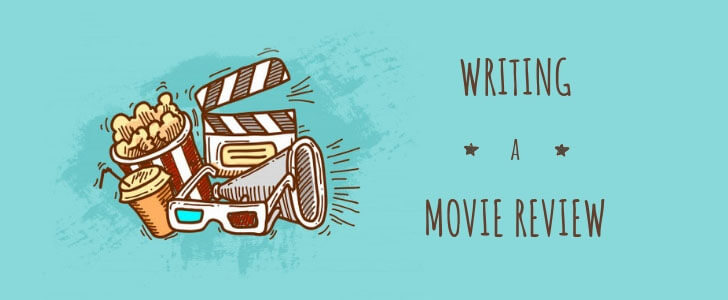

In [1]:
from IPython.display import display
from PIL import Image
img = Image.open(r"/Users/rahulsharma/Documents/jose+portillia+ml/my+notes/photos/movie-review-1.jpeg")
display(img)

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/Users/rahulsharma/Documents/jose+portillia+ml/DATA/moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [5]:
# check the nan_values
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
# drop nan values
df = df.dropna()

In [7]:
df.isnull().sum()

label     0
review    0
dtype: int64

#### TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or " " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well.

In [8]:
df['review'].str.isspace().sum()

27

In [9]:
df[~df['review'].str.isspace()] # this will return the opposite of it(like the reviews which doesn't have any space)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [10]:
df[df['review'].apply(lambda review :review=='')] 
# This shows that, we don't have the issue of the blank string

,label,review


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


# Confirm the value counts per label:

In [12]:
df['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

# EDA on Bag of Words
figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(stop_words='english')

In [15]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])

In [16]:
# cv.get_feature_names()

In [17]:
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

In [18]:
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [19]:
matrix1 = cv.fit_transform(df[df['label']=='pos']['review'])

In [20]:
freqs1 = zip(cv.get_feature_names(),matrix.sum(axis=0).tolist()[0])

In [21]:
print(sorted(freqs1, key=lambda x: -x[1])[:20])

[('evans', 4063), ('manners', 3131), ('jokingly', 1808), ('individual', 1480), ('stabbing', 1127), ('formulated', 1117), ('australia', 997), ('carnal', 926), ('shared', 908), ('oppressive', 888), ('carousel', 838), ('ladden', 813), ('plummet', 743), ('torn', 734), ('juncture', 696), ('devoted', 683), ('detractors', 666), ('detracts', 648), ('acronym', 635), ('recruitment', 634)]


### ### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [22]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [28]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [30]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

### TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.

In [31]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [32]:
preds = pipe.predict(X_test)

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.82      0.83      0.83       188
         pos       0.84      0.83      0.84       205

    accuracy                           0.83       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.83      0.83      0.83       393



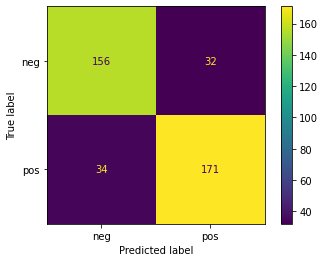

In [34]:
plot_confusion_matrix(pipe,X_test,y_test)

### Thank you